#  Image Preprocessing
  Start by testing preprocessing on a single image   
  Key Steps: Grayscale conversion, binarization, small area removal, masking, normalization   
  Comparison: Tried three different min_rain_area settings (115, 50, 10) to remove noise, with 10 being deemed the most suitable   


In [2]:
import cv2
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

#  File path
input_path = './dataOneDayTest/dpsri_240km_2024100700150000dBR.dpsri.png'  # Replace with your image path


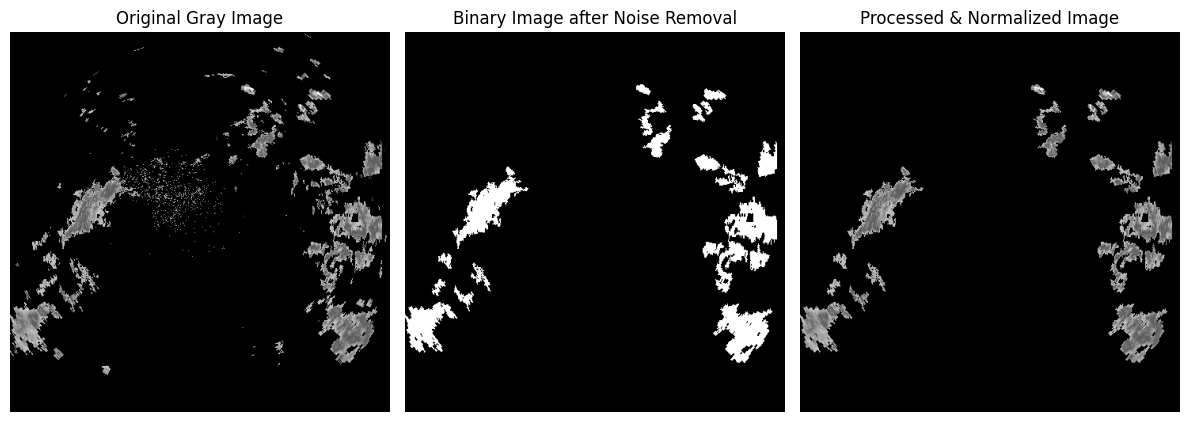

In [17]:

#  Set minimum rain area threshold
min_rain_area = 115  # Adjust this value as needed



#  Step 1: Read the image

In [4]:

img = cv2.imread(input_path)
if img is None:
    print("Error: Image failed to load. Please check if the file path is correct.")


#  Step 2: Convert to grayscale

In [5]:

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#  Step 3: Binarization

In [6]:


#  Set a threshold, assuming pixels below 30 are non-rain areas (adjust as needed)
_, binary_img = cv2.threshold(gray_img, 30, 255, cv2.THRESH_BINARY)



#  Step 4: Remove small areas

In [7]:

binary_img = morphology.remove_small_objects(binary_img.astype(bool), min_rain_area)
binary_img = (binary_img * 255).astype(np.uint8)  # Convert back to uint8 format in 0-255 range


#  Step 5: Apply mask

In [8]:


#  Use the binarized image as a mask on the original grayscale image
processed_img = cv2.bitwise_and(gray_img, gray_img, mask=binary_img)


#  Step 6: Normalize and Run

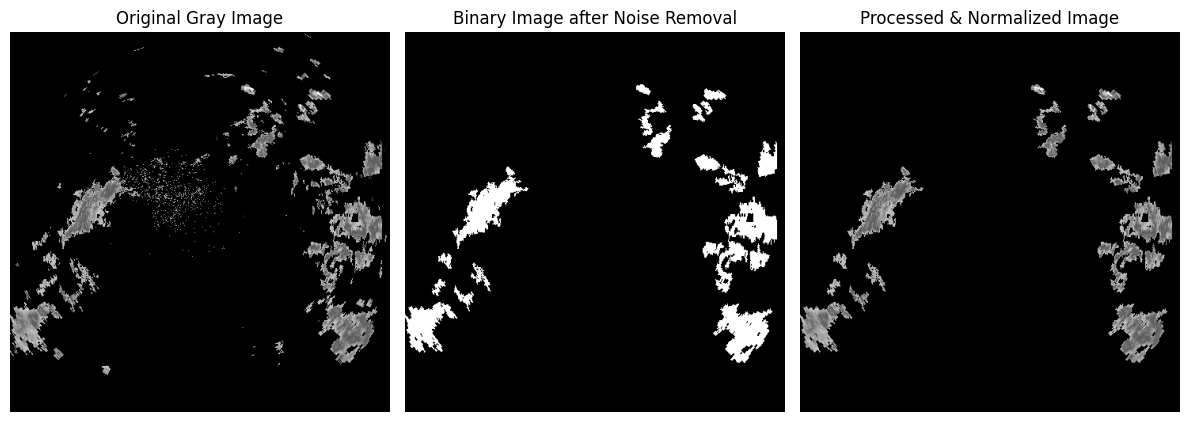

In [9]:

normalized_img = processed_img / 255.0  # Normalize to 0-1 range

#  Step 7: Display processing results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image after Noise Removal")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalized_img, cmap='gray')
plt.title("Processed & Normalized Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

#  Step 7: Display processing results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image after Noise Removal")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalized_img, cmap='gray')
plt.title("Processed & Normalized Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [12]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import numpy as np

#  Step 1: Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(gray_img, processed_img)
print(f"Mean Squared Error (MSE): {mse_value}")

#  Step 2: Calculate Structural Similarity Index (SSIM)
ssim_value = ssim(gray_img, processed_img, data_range=processed_img.max() - processed_img.min())
print(f"Structural Similarity Index (SSIM): {ssim_value}")

#  Step 3: Calculate change in the number of non-zero pixels
original_nonzero_count = np.count_nonzero(gray_img)
processed_nonzero_count = np.count_nonzero(processed_img)
loss_percentage = (original_nonzero_count - processed_nonzero_count) / original_nonzero_count * 100
print(f"Percentage of information loss based on non-zero pixels: {loss_percentage:.2f}%")


Mean Squared Error (MSE): 1.2891449652777778
Structural Similarity Index (SSIM): 0.8865834733617052
Percentage of information loss based on non-zero pixels: 19.83%


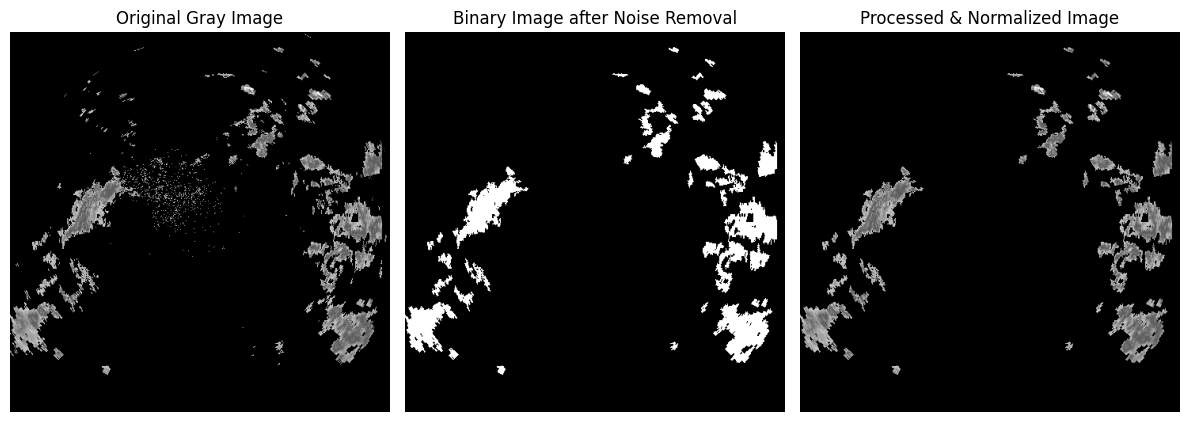

In [13]:
import cv2
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

#  File path
input_path = './dataOneDayTest/dpsri_240km_2024100700150000dBR.dpsri.png'  # Replace with your image path

#  Set minimum rain area threshold
min_rain_area = 50  # Adjust this value as needed

#  Step 1: Read the image
img = cv2.imread(input_path)
if img is None:
    print("Error: Image failed to load. Please check if the file path is correct.")
#  Step 2: Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#  Step 3: Binarization
#  Set a threshold, assuming pixels below 30 are non-rain areas (adjust as needed)
_, binary_img = cv2.threshold(gray_img, 30, 255, cv2.THRESH_BINARY)

#  Step 4: Remove small areas
binary_img = morphology.remove_small_objects(binary_img.astype(bool), min_rain_area)
binary_img = (binary_img * 255).astype(np.uint8)  # Convert back to uint8 format in 0-255 range

#  Step 5: Apply mask
#  Use the binarized image as a mask on the original grayscale image
processed_img = cv2.bitwise_and(gray_img, gray_img, mask=binary_img)

#  Step 6: Normalize
normalized_img = processed_img / 255.0  # Normalize to 0-1 range

#  Step 7: Display processing results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image after Noise Removal")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalized_img, cmap='gray')
plt.title("Processed & Normalized Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import numpy as np

#  Step 1: Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(gray_img, processed_img)
print(f"Mean Squared Error (MSE): {mse_value}")

#  Step 2: Calculate Structural Similarity Index (SSIM)
ssim_value = ssim(gray_img, processed_img, data_range=processed_img.max() - processed_img.min())
print(f"Structural Similarity Index (SSIM): {ssim_value}")

#  Step 3: Calculate change in the number of non-zero pixels
original_nonzero_count = np.count_nonzero(gray_img)
processed_nonzero_count = np.count_nonzero(processed_img)
loss_percentage = (original_nonzero_count - processed_nonzero_count) / original_nonzero_count * 100
print(f"Percentage of information loss based on non-zero pixels: {loss_percentage:.2f}%")


Mean Squared Error (MSE): 0.8266579861111112
Structural Similarity Index (SSIM): 0.9059433758658801
Percentage of information loss based on non-zero pixels: 13.16%


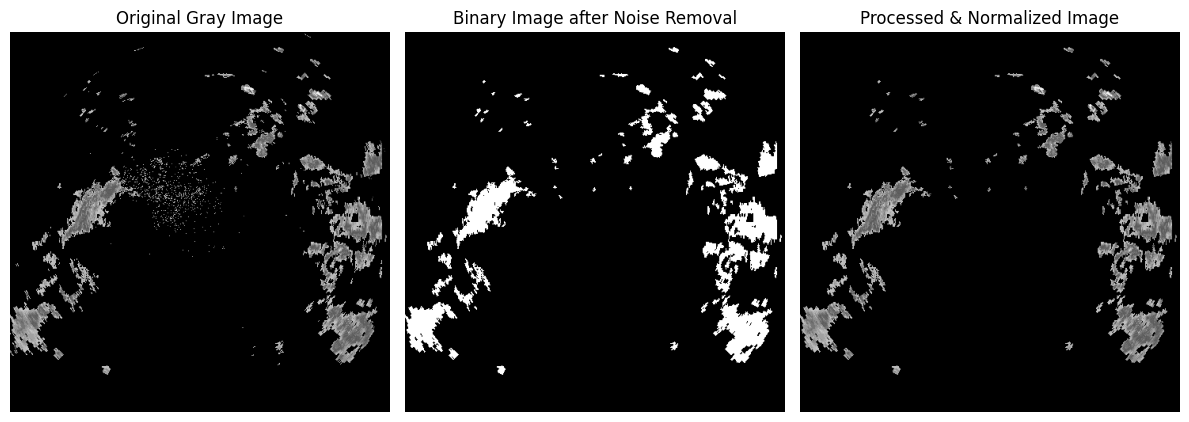

In [15]:
import cv2
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

#  File path
input_path = './dataOneDayTest/dpsri_240km_2024100700150000dBR.dpsri.png'  # Replace with your image path

#  Set minimum rain area threshold
min_rain_area = 10  # Adjust this value as needed

#  Step 1: Read the image
img = cv2.imread(input_path)
if img is None:
    print("Error: Image failed to load. Please check if the file path is correct.")
#  Step 2: Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#  Step 3: Binarization
#  Set a threshold, assuming pixels below 30 are non-rain areas (adjust as needed)
_, binary_img = cv2.threshold(gray_img, 30, 255, cv2.THRESH_BINARY)

#  Step 4: Remove small areas
binary_img = morphology.remove_small_objects(binary_img.astype(bool), min_rain_area)
binary_img = (binary_img * 255).astype(np.uint8)  # Convert back to uint8 format in 0-255 range

#  Step 5: Apply mask
#  Use the binarized image as a mask on the original grayscale image
processed_img = cv2.bitwise_and(gray_img, gray_img, mask=binary_img)

#  Step 6: Normalize
normalized_img = processed_img / 255.0  # Normalize to 0-1 range

#  Step 7: Display processing results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image after Noise Removal")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalized_img, cmap='gray')
plt.title("Processed & Normalized Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [16]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import numpy as np

#  Step 1: Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(gray_img, processed_img)
print(f"Mean Squared Error (MSE): {mse_value}")

#  Step 2: Calculate Structural Similarity Index (SSIM)
ssim_value = ssim(gray_img, processed_img, data_range=processed_img.max() - processed_img.min())
print(f"Structural Similarity Index (SSIM): {ssim_value}")

#  Step 3: Calculate change in the number of non-zero pixels
original_nonzero_count = np.count_nonzero(gray_img)
processed_nonzero_count = np.count_nonzero(processed_img)
loss_percentage = (original_nonzero_count - processed_nonzero_count) / original_nonzero_count * 100
print(f"Percentage of information loss based on non-zero pixels: {loss_percentage:.2f}%")


Mean Squared Error (MSE): 0.49816840277777774
Structural Similarity Index (SSIM): 0.9267134773342809
Percentage of information loss based on non-zero pixels: 8.06%
